# Convolutional Neural Network

This project is about using a Convolutional Neural Network (CNN) to classify images of cats and dogs. CNNs are very good at identifying patterns in images, which makes them useful for tasks like this.

### Goals:
1. Train the CNN using a dataset of labeled images (cats and dogs).
2. Test how well the model works on new test data.
3. Predict images from outside the dataset (like ones downloaded from the internet) to see if the model can generalize.
4. Show the predictions to help understand how the model works.

The project includes steps like preparing the data, training the model, and testing its predictions. It shows how CNNs can be used to solve problems in image classification.


## Importing the libraries  

In this section, we import all the necessary libraries. These libraries help us build, train, and visualize the Convolutional Neural Network (CNN) for classifying images of cats and dogs.

In [21]:
# Importing the necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


In [22]:
# Importing libraries for image visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Part 1 - Data Preprocessing

#### Preprocessing the Training Set

The training data is preprocessed using the `ImageDataGenerator` class, which applies the following transformations:

- **Rescaling**: Normalizes pixel values by dividing by 255.
- **Shearing**: Random shearing to improve robustness.
- **Zooming**: Random zoom to add variability.
- **Flipping**: Horizontal flipping to augment data.

The training images are loaded from the dataset with these parameters:

- **Target Size**: 64 x 64 pixels
- **Batch Size**: 32 images per batch
- **Class Mode**: 'binary' (for classifying cats and dogs).### Preprocessing the Training set

In [23]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    'C:/Users/saich/OneDrive/Desktop/Project - CNN for Image Classification/Project - CNN for Image Classification/dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


#### Preprocessing the Test Set

The test data is also preprocessed using the `ImageDataGenerator` class. Here, the preprocessing step involves:

- **Rescaling**: Normalizing pixel values by dividing by 255.

The test images are loaded with the following parameters:

- **Target Size**: 64 x 64 pixels
- **Batch Size**: 32 images per batch
- **Class Mode**: 'binary' (for classifying cats and dogs).

The test set contains **2000 images** belonging to 2 classes (cats and dogs).

In [24]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_set = test_datagen.flow_from_directory(
    'C:/Users/saich/OneDrive/Desktop/Project - CNN for Image Classification/Project - CNN for Image Classification/dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

This section focuses on creating a Convolutional Neural Network (CNN) step by step. We will add different layers such as Convolutional, Pooling, and Fully Connected layers to build a model capable of classifying images of cats and dogs.


### Initialising the CNN

The first step in building the CNN is to initialize it using the **Sequential** class. This prepares the foundation for adding layers to the model.


In [25]:
# Initialising the CNN
cnn = Sequential()

### Step 1 - Convolution

We add the **first convolutional layer** to extract key features like edges and patterns from the input image. 

- **Conv2D**: Uses 32 filters of size 3x3 with the ReLU activation function.
- **Input Shape**: 64x64 pixels with 3 color channels.


In [26]:
# Adding the first convolutional layer
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(64, 64, 3)))

C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 2 - Pooling

We add the **first pooling layer** to reduce the dimensions of the feature maps. 

- **MaxPooling2D**: Uses a 2x2 pool size with a stride of 2.  
- This helps reduce computation and highlights the most important features.


In [27]:
# Adding the first pooling layer
cnn.add(MaxPooling2D(pool_size=2, strides=2))

### Adding a Second Convolutional Layer

We add another **convolutional layer** followed by a **pooling layer** to further extract features and reduce dimensions.

- **Conv2D**: Adds a convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation.
- **MaxPooling2D**: Applies pooling with a 2x2 pool size and a stride of 2.
- This step helps the model learn more complex patterns.


In [28]:
# Adding a second convolutional layer and pooling
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

### Step 3 - Flattening

The **Flatten** layer converts the 2D feature maps from the previous layer into a **1D vector**. This makes the data ready for the fully connected layers.


In [29]:
# Flattening the layers
cnn.add(Flatten())

### Step 4 - Full Connection

The **Dense** layer adds a fully connected layer to combine all the features. Here:
- `units=128` specifies 128 neurons with **ReLU** activation.
- **Dropout** is applied to reduce overfitting by randomly dropping some connections during training.


In [30]:
# Adding a fully connected layer
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dropout(0.5))  # Optional: Helps prevent overfitting

### Step 5 - Output Layer

The output layer predicts the final result. Here:
- `units=1` means one neuron is used, as we are dealing with binary classification (Cat or Dog).
- The **Sigmoid activation** function outputs a value between 0 and 1, which helps decide the class.


In [31]:
# Adding the output layer
cnn.add(Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

To train the CNN, we compile it with the following:
- **Optimizer**: `adam` - It adjusts the learning rate during training for better results.
- **Loss**: `binary_crossentropy` - Since this is a binary classification problem (Cat or Dog), this loss function is used.
- **Metrics**: `accuracy` - Tracks how accurate the model is during training.


In [32]:
# Compiling the CNN
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Training the CNN on the Training Set and Evaluating it on the Test Set

To train the model, we use the **fit** function:
- **Training Data**: `training_set` - Used to train the CNN.
- **Validation Data**: `test_set` - Helps evaluate the model's performance during training.
- **Epochs**: `25` - The number of times the model trains on the entire training dataset.

The model learns patterns in the images of cats and dogs through multiple training iterations (epochs). The validation set helps check how well the model generalizes to unseen data.


In [33]:
# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(
    x=training_set,
    validation_data=test_set,
    epochs=25  # You can adjust the number of epochs based on performance and time
)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 119s 468ms/step - accuracy: 0.5547 - loss: 0.6884 - val_accuracy: 0.6625 - val_loss: 0.6273
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 130ms/step - accuracy: 0.6512 - loss: 0.6281 - val_accuracy: 0.7025 - val_loss: 0.5752
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 151ms/step - accuracy: 0.6883 - loss: 0.5913 - val_accuracy: 0.7270 - val_loss: 0.5408
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 128ms/step - accuracy: 0.7194 - loss: 0.5550 - val_accuracy: 0.7415 - val_loss: 0.5236
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 33s 131ms/step - accuracy: 0.7398 - loss: 0.5236 - val_accuracy: 0.7425 - val_loss: 0.5181
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 122ms/step - accuracy: 0.7331 - loss: 0.5214 - val_accuracy: 0.7565 - val_loss: 0.4951
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 38s 152ms/step - accuracy: 0.7581 - loss: 0.4940 - val_accuracy: 0.7505 - val_loss: 0.5113
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 37s 149ms/step - accuracy: 0.7702 - loss: 

### Part 4 - Making a Single Prediction

In this step, we use the trained CNN model to predict whether a single image is of a cat or a dog.

**Steps:**  
1. **Input Image Path**:  
   Update the `image_path` variable with the image file located in the `single_prediction` folder.  
   Example:  
   image_path = 'dataset/single_prediction/cat_or_dog_1.jpg'

2. Load the image and resize it to match the input size of the CNN model (64x64 pixels).
3. Convert the image to an array and add a batch dimension.
4. Use the `predict` function to determine the class of the image.
5. Compare the prediction with the class index to display the result as **Cat** or **Dog**.

This step demonstrates the model's ability to predict images, including ones outside the training or test datasets.


**2. Displaying the Predicted Image**  
The predicted image is displayed along with the class label (Cat or Dog).  
- This helps us visually confirm the prediction made by the model.

In [36]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

# Path to the image for prediction
image_path = 'C:/Users/saich/OneDrive/Desktop/Project - CNN for Image Classification/Project - CNN for Image Classification/dataset/single_prediction/cat_or_dog_1.jpg'

# Load the image
test_image = load_img(image_path, target_size=(64, 64))  # Resize to match the input size of the CNN
test_image = img_to_array(test_image)  # Convert image to array
test_image = np.expand_dims(test_image, axis=0)  # Add a batch dimension

# Make the prediction
result = cnn.predict(test_image)
if training_set.class_indices['cats'] == 0:
    predicted_class = 'Cat' if result[0][0] < 0.5 else 'Dog'
else:
    predicted_class = 'Dog' if result[0][0] < 0.5 else 'Cat'

print(f"The model predicts this image is a: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The model predicts this image is a: Dog


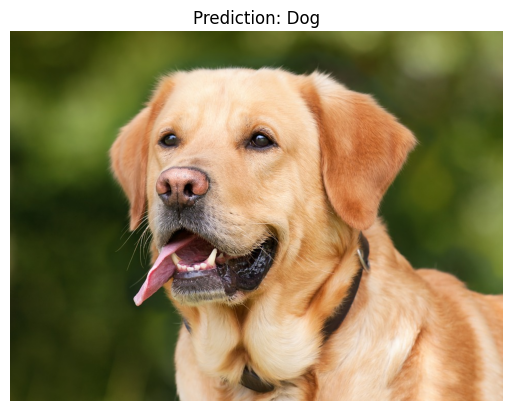

In [37]:
# Display the predicted image
img = mpimg.imread(image_path) 
plt.imshow(img)  
plt.title(f"Prediction: {predicted_class}")  
plt.axis('off')  
plt.show()